# TODO

## Installing Libraries

In [1]:
%pip install numpy pandas scipy matplotlib tqdm keras-tqdm

## Data download and inspection

In [2]:
# %tensorflow_version 2.x            # We want use TF version >= 2.0
import tensorflow as tf             # The NN backend
from tensorflow.python.keras import layers, Sequential, Model, regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys, pathlib
import tqdm
from keras_tqdm import TQDMNotebookCallback

In [3]:
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-Re.csv
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-data.csv
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-space.csv

--2023-10-13 23:24:52--  https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-Re.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1200006 (1.1M) [text/plain]
Saving to: ‘velprof-Re.csv.4’

velprof-Re.csv.4    100%[===================>]   1.14M  --.-KB/s    in 0.04s   

2023-10-13 23:24:52 (29.0 MB/s) - ‘velprof-Re.csv.4’ saved [1200006/1200006]

--2023-10-13 23:24:52--  https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awai

Read Reynolds (the lables for our model)

In [4]:
data_Re = pd.read_csv("velprof-Re.csv", index_col=False)
data_Re.head()

,Re(-)
0,323590.756
1,194866.844
2,104938.956
3,227933.606
4,817618.639


Read the data file (the features for our model)

In [5]:
data_v = pd.read_csv("velprof-data.csv", index_col=False)
data_v.head()

,mu(Pas),rho(kg/m3),L(m),R(m),vel[0](m/s),vel[1](m/s),vel[2](m/s),vel[3](m/s),vel[4](m/s),vel[5](m/s),...,vel[40](m/s),vel[41](m/s),vel[42](m/s),vel[43](m/s),vel[44](m/s),vel[45](m/s),vel[46](m/s),vel[47](m/s),vel[48](m/s),vel[49](m/s)
0,0.000630,996.232835,69.244194,0.408814,0.299430,0.298652,0.297860,0.297052,0.296230,0.295391,...,0.241785,0.238218,0.234238,0.229725,0.224501,0.218267,0.210486,0.199988,0.183239,0.0
1,0.001484,1117.370480,94.471272,0.352740,0.443518,0.442301,0.441061,0.439799,0.438513,0.437201,...,0.353860,0.348349,0.342204,0.335246,0.327199,0.317612,0.305665,0.289586,0.264034,0.0
2,0.000372,1039.442220,89.215592,0.248828,0.092274,0.092004,0.091728,0.091448,0.091162,0.090870,...,0.072484,0.071278,0.069935,0.068416,0.066662,0.064576,0.061983,0.058504,0.053003,0.0
3,0.000189,1045.145970,20.190082,0.086718,0.286730,0.285957,0.285169,0.284366,0.283549,0.282715,...,0.229634,0.226117,0.222195,0.217751,0.212611,0.206484,0.198845,0.188556,0.172184,0.0
4,0.002309,1086.237000,17.299562,0.136982,7.472177,7.454603,7.436702,7.418460,7.399864,7.380898,...,6.157494,6.075227,5.983290,5.878885,5.757750,5.612884,5.431484,5.185726,4.791076,0.0


In [6]:
data_r = pd.read_csv("velprof-space.csv", index_col=False)
data_r.head()

,r[0](m),r[1](m),r[2](m),r[3](m),r[4](m),r[5](m),r[6](m),r[7](m),r[8](m),r[9](m),...,r[40](m),r[41](m),r[42](m),r[43](m),r[44](m),r[45](m),r[46](m),r[47](m),r[48](m),r[49](m)
0,0.0,0.008343,0.016686,0.025029,0.033373,0.041716,0.050059,0.058402,0.066745,0.075088,...,0.333726,0.342069,0.350412,0.358756,0.367099,0.375442,0.383785,0.392128,0.400471,0.408814
1,0.0,0.007199,0.014398,0.021596,0.028795,0.035994,0.043193,0.050391,0.057590,0.064789,...,0.287951,0.295150,0.302349,0.309548,0.316746,0.323945,0.331144,0.338343,0.345541,0.352740
2,0.0,0.005078,0.010156,0.015234,0.020312,0.025391,0.030469,0.035547,0.040625,0.045703,...,0.203125,0.208203,0.213281,0.218359,0.223437,0.228515,0.233593,0.238672,0.243750,0.248828
3,0.0,0.001770,0.003539,0.005309,0.007079,0.008849,0.010618,0.012388,0.014158,0.015928,...,0.070790,0.072560,0.074329,0.076099,0.077869,0.079639,0.081408,0.083178,0.084948,0.086718
4,0.0,0.002796,0.005591,0.008387,0.011182,0.013978,0.016773,0.019569,0.022364,0.025160,...,0.111822,0.114618,0.117414,0.120209,0.123005,0.125800,0.128596,0.131391,0.134187,0.136982


In [7]:
data_all =  pd.concat([data_v, data_Re], axis=1)

Let's plot a random profile

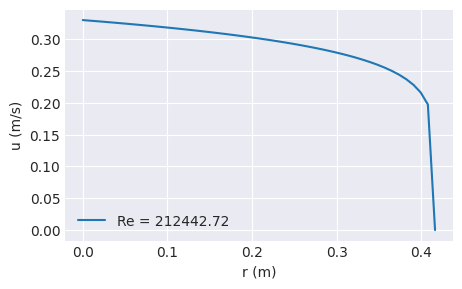

In [8]:
fig = plt.figure(figsize=(5,3))
indx = np.random.randint(data_v.shape[0]-1)

with plt.style.context("seaborn-v0_8-darkgrid"):
  ax = fig.add_subplot(111)
  ax.plot(data_r.iloc[indx,:], data_v.iloc[indx,4:], label=f"Re = {data_Re.iloc[indx].values[0]:1.2f}")
  ax.legend(loc="lower left")
  ax.set_xlabel("r (m)")
  ax.set_ylabel("u (m/s)")

Let's study the data and its correlation

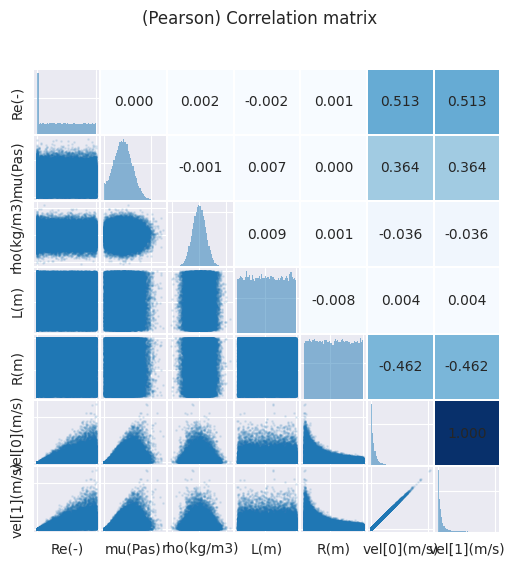

In [9]:
# Correlation matrix plot

Nbins = 50
fig = plt.figure(figsize=(6,6))
label = ["Re(-)", "mu(Pas)", "rho(kg/m3)", "L(m)", "R(m)", "vel[0](m/s)", "vel[1](m/s)"]
N = len(label)
corr_matrix = data_all.corr()
with plt.style.context("seaborn-v0_8-darkgrid"):
  gird = fig.add_gridspec(N, N, wspace=0.03, hspace=0.03)
  ax = []
  cmap = plt.get_cmap('Blues')
  for i in range(N):
    for j in range(N):
      ax.append(fig.add_subplot(gird[i,j]))
      if j < i:
        ax[-1].scatter(data_all[label[j]], data_all[label[i]], s=1, alpha=.1)
      elif j > i:
        corr = corr_matrix.loc[label[j], label[i]]
        ax[-1].text(.5, 0.5, f"{corr:1.3f}", ha="center", va="center")
        ax[-1].set_facecolor(cmap(np.abs(corr)))
        ax[-1].set_xticks([])
        ax[-1].set_yticks([])
      else:
        ax[-1].hist(data_all[label[i]], bins=Nbins, alpha=.5)
      if j == 0  or i == N-1:
        if j == 0  and i != N-1:
          ax[-1].set_ylabel(label[i])
          ax[-1].set_xticklabels([])
        elif i == N-1 and j != 0:
          ax[-1].set_xlabel(label[j])
          ax[-1].set_yticklabels([])
        else:
          ax[-1].set_ylabel(label[i])
          ax[-1].set_xlabel(label[j])
      ax[-1].set_xticklabels([])
      ax[-1].set_yticklabels([])
  fig.suptitle("(Pearson) Correlation matrix")
plt.show()

## Split database

80,000 is too many; let's reduce it to 10,000 by randomly selecting from the entire database.



In [56]:
Nall = data_v.shape[0]
Nsmall = 10000

rand_gen = np.random.default_rng(seed=1234)
indx = rand_gen.choice(np.arange(Nall), size=Nsmall, replace=False)

data_v_small = data_v.iloc[indx, :]
data_Re_small = data_Re.iloc[indx, :]

let's store it

In [57]:
data_v_small.to_csv("small-data.csv", index=False)
data_Re_small.to_csv("small-Re.csv", index=False)

## Model 1

We are going to use our model for binary classification, specifically to distinguish between turbulent and non-turbulent conditions. It's important to note that in the context of our database, "non-turbulent" refers to laminar conditions, although in reality, laminar flow isn't always the case.


### Setup database

We load the *features* and the *labels* of our first model

In [58]:
features = pd.read_csv("small-data.csv", index_col=False).iloc[:,4:] # note: we drop the first 4 colomns to study only the velocity profile
label = pd.read_csv("small-Re.csv", index_col=False)


In [59]:
features.head()

,vel[0](m/s),vel[1](m/s),vel[2](m/s),vel[3](m/s),vel[4](m/s),vel[5](m/s),vel[6](m/s),vel[7](m/s),vel[8](m/s),vel[9](m/s),...,vel[40](m/s),vel[41](m/s),vel[42](m/s),vel[43](m/s),vel[44](m/s),vel[45](m/s),vel[46](m/s),vel[47](m/s),vel[48](m/s),vel[49](m/s)
0,0.000331,0.000331,0.000331,0.000330,0.000329,0.000328,0.000326,0.000325,0.000323,0.000320,...,0.000111,0.000099,0.000088,0.000076,0.000064,0.000052,0.000039,0.000027,0.000013,-0.0
1,0.084114,0.083860,0.083602,0.083339,0.083071,0.082798,0.082519,0.082235,0.081945,0.081649,...,0.065614,0.064491,0.063242,0.061829,0.060198,0.058261,0.055856,0.052633,0.047548,0.0
2,1.240614,1.237663,1.234656,1.231592,1.228469,1.225284,1.222034,1.218717,1.215329,1.211867,...,1.020042,1.006257,0.990853,0.973365,0.953078,0.928823,0.898463,0.857349,0.791374,0.0
3,0.005336,0.005334,0.005327,0.005316,0.005300,0.005280,0.005256,0.005227,0.005194,0.005156,...,0.001780,0.001600,0.001416,0.001227,0.001033,0.000836,0.000633,0.000427,0.000216,-0.0
4,0.487076,0.485866,0.484634,0.483379,0.482099,0.480794,0.479463,0.478104,0.476717,0.475300,...,0.397047,0.391447,0.385194,0.378099,0.369876,0.360055,0.347778,0.331181,0.304622,0.0


In [60]:
label.head()

,Re(-)
0,125.03352
1,80552.84300
2,734531.24200
3,1013.78375
4,492712.83800


Now we convert the labels from numerical (`float`) into boolean (`bool`), where:

 * `True` when the flow is turbulent
 * `False` whein the flow is non-turbulent

In [61]:
labels_Re = label.pop('Re(-)')
label['Turbolent'] = (labels_Re > 2000)

In [62]:
label.head()

,Turbolent
0,False
1,True
2,True
3,False
4,True


Now we split the training and test set (with ratio 80/20)



In [63]:
label_train = label.iloc[2000:, :]
label_test = label.iloc[:2000, :]
features_train = features.iloc[2000:, :]
features_test = features.iloc[:2000, :]
# the Re number will be useful later
labels_Re_train = labels_Re.iloc[2000:]
labels_Re_test = labels_Re.iloc[:2000]

Storing

In [64]:
pathlib.Path("model_1").mkdir(parents=True, exist_ok=True) # make a folder
# make train and test subfolder
pathlib.Path(os.path.join("model_1","train")).mkdir(exist_ok=True)
pathlib.Path(os.path.join("model_1","test")).mkdir(exist_ok=True)
# storin
label_train.to_csv(os.path.join("model_1","train", "label.csv"), index=False)
label_test.to_csv(os.path.join("model_1","test", "label.csv"), index=False)
features_train.to_csv(os.path.join("model_1","train", "features.csv"), index=False)
features_test.to_csv(os.path.join("model_1","test", "features.csv"), index=False)


### Build the model with **Keras** and **TensorFlow**

In [65]:
def model_1(n_cols):
  model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_cols,), name='in'),
    tf.keras.layers.Dense(64, activation='relu', name='h1'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='out')
  ])
  return model

Let us call the function and build the model

In [66]:
model = model_1(features.shape[1])

And let us see if if is all in order

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 64)                3264      
                                                                 
 out (Dense)                 (None, 1)                 65        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


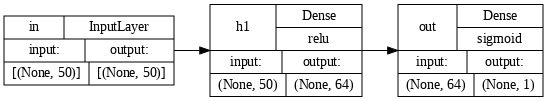

In [68]:
tf.keras.utils.plot_model(model = model , rankdir="LR", dpi=72, show_shapes=True, show_layer_activations=True)

### Model compile

Now we have to "compile" the model. Which means choose the loss fanction, the traingin strategy and optimizer (and learning rate), and the right metrics for the evaulation.

* **Loss Function**: it is the critera by which to evaluate the accuracy of the model. The traing goal is to minimize this function. For this case we choose the Sparse Categorical Crossentropy

* **Optimizer**: It defines the model weights serchin criteria to minimize the loss function. In this tutotrial we choose the common Adam

* **Metrics**: It the wey yo evaulate the goodness of the model. For this kind of model usualy we choose the Accuracy

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2,
                                     beta_1=0.9,
                                     beta_2=0.999,
                                     epsilon=1e-08)
loss= tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics=[
    tf.keras.metrics.Accuracy(),
    tf.keras.metrics.BinaryAccuracy(threshold=0.5),
]

model.compile(
    optimizer,
    loss,
    metrics,
)

### Training

In [70]:
batch_size = 512
epochs = 100

In [71]:
history = model.fit(
    np.array(features_train), # before to feed the data we convert it into an array
    np.array(label_train).astype('float'),
    batch_size,
    epochs,
    validation_data=(np.array(features_test), np.array(label_test).astype('float')), # test-set
    verbose = 1, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 1s 25ms/step - loss: 0.2245 - accuracy: 0.1576 - binary_accuracy: 0.8487 - val_loss: 0.1189 - val_accuracy: 0.2860 - val_binary_accuracy: 0.9045
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1150 - accuracy: 0.3530 - binary_accuracy: 0.9020 - val_loss: 0.1073 - val_accuracy: 0.3825 - val_binary_accuracy: 0.9045
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1044 - accuracy: 0.4184 - binary_accuracy: 0.9020 - val_loss: 0.0998 - val_accuracy: 0.4285 - val_binary_accuracy: 0.9045
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0981 - accuracy: 0.4552 - binary_accuracy: 0.9634 - val_loss: 0.0948 - val_accuracy: 0.4660 - val_binary_accuracy: 0.9770
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0931 - accuracy: 0.4997 - binary_accuracy: 0.9783 - val_loss: 0.0902 - val_accuracy: 0.5125 - val_binary_accuracy: 0.9830
Epoch 6/100
16/16 [=======

Now we plot the training

In [72]:
# Plot traing loop
train_binary_accuracy = np.array(history.history['binary_accuracy'])
test_binary_accuracy = np.array(history.history['val_binary_accuracy'])
train_loss = np.array(history.history['loss'])
test_loss = np.array(history.history['val_loss'])


epochs_i = np.arange(1,train_loss.shape[0]+1)

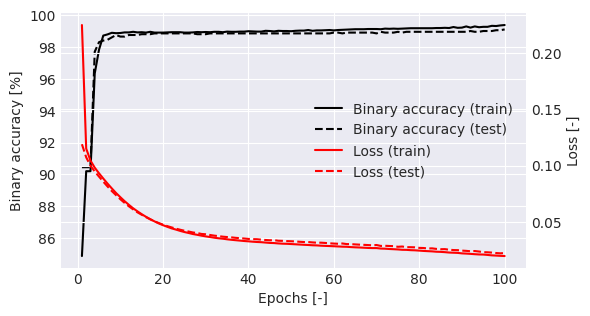

In [73]:
fig = plt.figure(figsize=(6,3.3))
with plt.style.context("seaborn-v0_8-darkgrid"):
  ax = fig.add_subplot(111)
  ax_twin = ax.twinx()
  a1 = ax.plot(epochs_i, train_binary_accuracy*100, color='k', ls='-', label='Binary accuracy (train)')
  a2 = ax.plot(epochs_i, test_binary_accuracy*100, color='k', ls='--', label='Binary accuracy (test)')
  l1 = ax_twin.plot(epochs_i, train_loss, color='r', ls='-', label='Loss (train)')
  l2 = ax_twin.plot(epochs_i, test_loss, color='r', ls='--', label='Loss (test)')
  ax.set_xlabel('Epochs [-]')
  ax.set_ylabel('Binary accuracy [%]')
  ax_twin.set_ylabel('Loss [-]')
  ax_twin.legend(a1+a2+l1+l2, ['Binary accuracy (train)', 'Binary accuracy (test)', 'Loss (train)', 'Loss (test)'], loc='center right')
plt.show()

Now we compere the prediction respect the Reynolds number

In [32]:
predictions = model.predict(np.array(features_test))

125/125 [==============================] - 0s 1ms/step


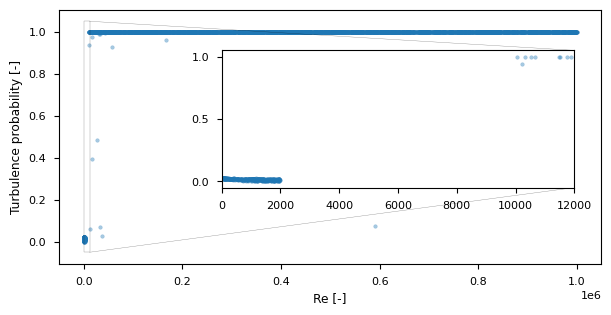

In [55]:
fig = plt.figure(figsize=(7,3.3))
with plt.style.context("seaborn-v0_8-paper"):
  ax = fig.add_subplot(111)
  axins = ax.inset_axes([0.3, 0.3, 0.65, 0.54])
  ax.scatter(labels_Re_test, predictions, s=7, alpha=.4)
  axins.scatter(labels_Re_test, predictions, s=7, alpha=.4)
  axins.set_xlim([0, 12000])
  ax.indicate_inset_zoom(axins, edgecolor="black")
  ax.set_xlabel('Re [-]')
  ax.set_ylabel('Turbulence probability [-]')